In [ ]:
import os, cv2

import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

In [ ]:
!unzip Bag.zip

In [ ]:
f_path = '/content/Bag'

In [ ]:
def img_process(f_path):
    data = []
    IMG_SIZE = 224
    categories = ["Garbage", "Paper","Plastic"]
    for category in categories:
        path_link = os.path.join(f_path, category)
        label = categories.index(category)
        print(label)
        for image in os.listdir(path_link):
            try:
                img_array = cv2.imread(os.path.join(path_link, image), cv2.IMREAD_COLOR)
                resized_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                data.append([resized_array, label])
            except Exception as e:
                print(e)
    print(data)
    return data

In [ ]:
x = []
y = []
integrate = img_process(f_path)
for feature, label in np.array(integrate):
    x.append(feature)
    y.append(label)
X = np.array(x)
X = X.reshape(-1, 224, 224, 3)

label_bin = LabelBinarizer()
y = label_bin.fit_transform(y)
Y = np.array(y)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42, test_size=0.2)

print('x and y are: ')




In [ ]:
train_generator = ImageDataGenerator(rescale=1/255, zoom_range=0.2, horizontal_flip=True, rotation_range=30)
test_generator = ImageDataGenerator(rescale=1/255)

train_generator = train_generator.flow(np.array(X_train), Y_train, shuffle=False)
test_generator = test_generator.flow(np.array(X_test), Y_test, shuffle=False)


In [ ]:
X_train.shape[1:]

(224, 224, 3)

In [ ]:
model = Sequential()
model.add(Conv2D(256, (3, 3), activation="relu", input_shape=X_train.shape[1:]))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(128, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Flatten())
model.add(Dropout(0.25))

model.add(Dense(64, activation="relu"))
model.add(Dense(3, activation="softmax"))

model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 256)     7168      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 111, 111, 256)    0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 128)     295040    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 54, 54, 128)      0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 52, 52, 64)        73792     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 26, 26, 64)      

Epoch 1/30
11/11 [==============================] - 6s 368ms/step - loss: 1.0872 - accuracy: 0.3769 - val_loss: 1.0875 - val_accuracy: 0.3294
Epoch 2/30
11/11 [==============================] - 5s 433ms/step - loss: 0.9277 - accuracy: 0.5697 - val_loss: 0.8591 - val_accuracy: 0.6471
Epoch 3/30
11/11 [==============================] - 4s 365ms/step - loss: 0.8173 - accuracy: 0.6558 - val_loss: 0.9125 - val_accuracy: 0.5529
Epoch 4/30
11/11 [==============================] - 4s 376ms/step - loss: 0.8509 - accuracy: 0.6083 - val_loss: 0.8727 - val_accuracy: 0.4471
Epoch 5/30
11/11 [==============================] - 4s 366ms/step - loss: 0.8030 - accuracy: 0.6677 - val_loss: 0.7914 - val_accuracy: 0.6235
Epoch 6/30
11/11 [==============================] - 4s 358ms/step - loss: 0.6592 - accuracy: 0.7151 - val_loss: 0.6340 - val_accuracy: 0.7176
Epoch 7/30
11/11 [==============================] - 5s 433ms/step - loss: 0.6194 - accuracy: 0.7478 - val_loss: 0.5212 - val_accuracy: 0.8000
Epoch 

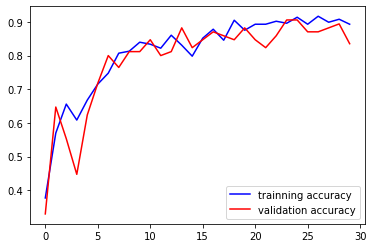

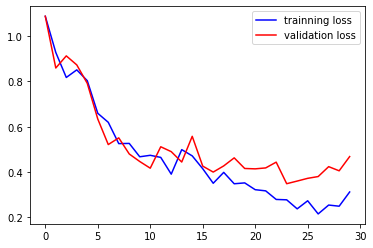

In [ ]:
history = model.fit(train_generator, batch_size = 5,epochs=30, validation_data=test_generator, shuffle=True, validation_steps=len(test_generator))

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, "b", label="trainning accuracy")
plt.plot(epochs, val_accuracy, "r", label="validation accuracy")
plt.legend()
plt.show()

plt.plot(epochs, loss, "b", label="trainning loss")
plt.plot(epochs, val_loss, "r", label="validation loss")
plt.legend()
plt.show()


In [ ]:
model.save("bag.model")

In [ ]:
prediction = model.predict(X_test)
np.argmax(prediction,axis=1)

3/3 [==============================] - 0s 62ms/step


array([2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 1, 2, 0, 2, 1, 1, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 0, 1, 2, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2])

In [ ]:
labels_new = ["Garbage", "Paper","Plastic"]

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(np.argmax(Y_test, axis=1), np.argmax(prediction,axis=1), target_names=labels_new))

              precision    recall  f1-score   support

     Garbage       1.00      0.19      0.32        37
       Paper       0.92      0.55      0.69        22
     Plastic       0.38      0.96      0.55        26

    accuracy                           0.52        85
   macro avg       0.77      0.57      0.52        85
weighted avg       0.79      0.52      0.48        85



In [ ]:
labels_new = ["Garbage", "Paper","Plastic"]
IMG_SIZE = 224
def prepare(filepath):
    img_array = cv2.imread(filepath, cv2.IMREAD_COLOR)
    img_array = img_array / 255
    resized_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return resized_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)

model = tf.keras.models.load_model("./bag.model")

In [ ]:
prediction = model.predict([prepare("/content/Bag/Plastic/15.jpg")])
np.argmax(prediction)

prediction

1/1 [==============================] - 0s 35ms/step


array([[0.05080462, 0.12020026, 0.8289951 ]], dtype=float32)

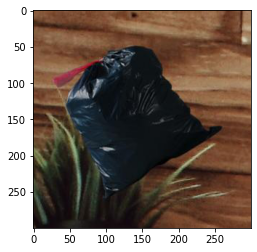

In [ ]:
plt.imshow(plt.imread("/content/Bag/Garbage/00000026.jpg"))

1/1 [==============================] - 0s 35ms/step
This is Plastic Bag with confidence of 0.9340904


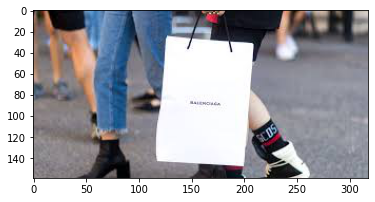

In [ ]:
prediction = model.predict([prepare("/content/Bag/Paper/15.jpg")])
plt.imshow(plt.imread("/content/Bag/Paper/15.jpg"))
np.argmax(prediction)

print("This is "+labels_new[np.argmax(prediction)]+' Bag with confidence of '+str(prediction[0][np.argmax(prediction)]))
# for i in prediction:
#   for j in i:
#     print(float(j))
